# Réseau de neurones

## Import packages

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten

# Implémentation en code python

## Data preparation

In [3]:
data = pd.read_csv("mnist_all.csv")

def vectorize_label(labels):
    new_label = []
    for label in labels:
        y = np.zeros((10, 1))
        y[label] = 1
        new_label.append(y)
    return new_label

def normalization (data):
    return data/255

def validation(digit):
    dt = keras.utils.to_categorical(digit, 10)
    return dt


# Normalisation
X = np.array(data.iloc[:, 1:])
y = data.iloc[:, 0]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0, stratify=y)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.17, random_state=0, stratify=y_train)

x_train = x_train / 255.
x_test = x_test / 255.

#x_train = x_train.reshape(len(x_train), 28, 28, 1)
#x_test = x_test.reshape(len(x_test), 28, 28, 1)
#x_validate = x_validate.reshape(len(x_validate), 28, 28, 1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_validate = keras.utils.to_categorical(y_validate, 10)

print('shape X train : ', x_train.shape)
print('shape X test : ', x_test.shape)
print('shape X validate : ', x_validate.shape)
print('shape Y train : ', y_train.shape)
print('shape Y test : ', y_test.shape)
print('shape Y validate : ', y_validate.shape)

train = [x_train, y_train]
tesy = [x_test, y_test]
validate = [x_validate, y_validate]

shape X train :  (49384, 784)
shape X test :  (10500, 784)
shape X validate :  (10115, 784)
shape Y train :  (49384, 10)
shape Y test :  (10500, 10)
shape Y validate :  (10115, 10)


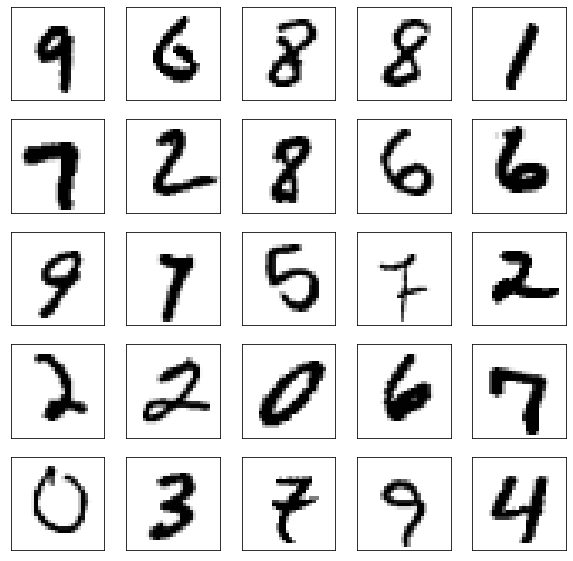

In [3]:
# Display a few images and their labels
plt.figure(figsize=(10,10))
xtrain = x_train.reshape(len(x_train), 28, 28, 1)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap=plt.cm.binary)
    #plt.text(0, 7, str(y_train[i]))
#plt.show()

In [4]:
# To generate noisy images :
noise = np.random.normal(loc=0, scale=0.8, size=x_train.shape)
x_train_noisy = x_train + noise
noise = np.random.normal(loc=0, scale=0.8, size=x_test.shape)
x_test_noisy = x_test + noise
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## Model construction

In [5]:
model = keras.models.Sequential([
    #deux couches cachées de 128 neurones avec des activations ReLu
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    #une couche de sortie de 10 neurones avec activation Softmax
    Dense(10, activation='softmax')
                                ])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train, epochs=20, batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/20
386/386 [==============================] - 1s 2ms/step - loss: 0.5193 - accuracy: 0.8552
Epoch 2/20
386/386 [==============================] - 1s 2ms/step - loss: 0.2301 - accuracy: 0.9339
Epoch 3/20
386/386 [==============================] - 1s 3ms/step - loss: 0.1755 - accuracy: 0.9491
Epoch 4/20
386/386 [==============================] - 1s 2ms/step - loss: 0.1418 - accuracy: 0.9589
Epoch 5/20
386/386 [==============================] - 1s 2ms/step - loss: 0.1187 - accuracy: 0.9651
Epoch 6/20
386/386 [==============================] - 1s 2ms/step - loss: 0.1009 - accuracy: 0.9708
Epoch 7/20
386/386 [==============================] - 1s 2ms/step - loss: 0.0879 - accuracy: 0.9746
Epoch 8/20
386/386 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9780
Epoch 9/20
386/386 [==============================] - 1s 2ms/step - loss: 0.0674 - accuracy: 0.9812
Epoch 10/20
386/386 [==============================] - 1s 2ms/step - loss: 0.0598 - accuracy: 0.9831

In [ ]:
model = keras.models.Sequential([
    #deux couches cachées de 128 neurones avec des activations ReLu
    Dense(350, activation='sigmoid'),
    Dense(50, activation='sigmoid'),
    #une couche de sortie de 10 neurones avec activation Softmax
    Dense(10, activation='softmax')
                                ])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor = "val_loss", 
                             mode = "min", patience = 3, 
                                             restore_best_weights = True)

history = model.fit(x_train, y_train, epochs=20,
                    batch_size=1, callbacks=[callback], verbose=2, 
                   validation_data = [x_test, y_test])

# Préparation des données

# Elaboration de l'expérimentation